## Importing data files and visualization 

In [3]:
#Importing the X_train and Y_train data 
import pandas as pd
X_train = pd.read_csv('X_train.txt', sep = '\n', names = ['X_train'])
Y_train = pd.read_csv('Y_train.txt', sep = '\n', names = ['Y_train'])

In [4]:
#Concating the X & Y for further analysis
data = pd.concat([X_train, Y_train], axis=1, sort=False)
data.head()

,X_train,Y_train
0,0.010050,0.300949
1,-0.316583,-9.705391
2,-1.396985,-9.460064
3,0.839196,28.712076
4,-1.296482,-12.910477


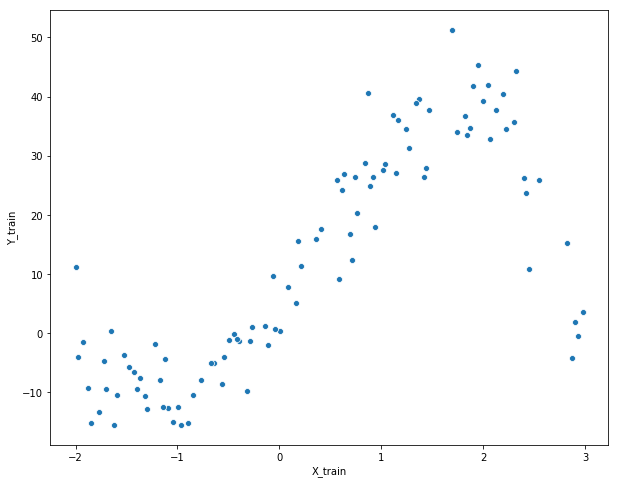

In [6]:
#Scatter plot to visulaize the relationship between X & Y
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure( figsize = ( 10, 8 ) )
sns.scatterplot(data.X_train,data.Y_train)

### Assuming the relationship: Y = m * X^2 + c. Will be fitting linear regression on X^2 and Y using Gradient Algorithm. 

In [8]:
# Creating a new field, X_train^2 for further analysis
data['X2_train']=data['X_train']*data['X_train']
data.head()

,X_train,Y_train,X2_train
0,0.010050,0.300949,0.000101
1,-0.316583,-9.705391,0.100225
2,-1.396985,-9.460064,1.951567
3,0.839196,28.712076,0.704250
4,-1.296482,-12.910477,1.680866


## 1. Find the function and its parameters which map X_train to Y_train (Hint: assume a polynomial function) 

In [9]:
# Building the model
m = 0 # Slope
c = 0 # Intercept 

L = 0.0001  # The learning Rate
epochs = 1000  # The number of iterations to perform gradient descent

n = float(len(data['X2_train'])) # Number of elements in X_train

# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = m*data['X2_train'] + c  # The current predicted value of Y
    D_m = (-2/n) * sum(data['X2_train'] * (data['Y_train'] - Y_pred))  # Sum of Least sq function: Derivative wrt m
    D_c = (-2/n) * sum(data['Y_train'] - Y_pred)  # Sum of Least sq function: Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c
    
print (m, c)

2.832091361971005 1.3825233945322648


### Function: Y = 2.83 * X^2 + 1.38 

## 2. Find the estimated values of Y_train using the function above and X_train 

In [14]:
#Calculating the value of Y_estimate
data['Y_estimated']=m*data['X_train']*data['X_train']+c
data.head()

,X_train,Y_train,X2_train,Y_estimated
0,0.010050,0.300949,0.000101,1.382809
1,-0.316583,-9.705391,0.100225,1.666369
2,-1.396985,-9.460064,1.951567,6.909540
3,0.839196,28.712076,0.704250,3.377024
4,-1.296482,-12.910477,1.680866,6.142888


## 3. Estimate the test output, Y_test at each value of X_test 

In [11]:
#Importing the X_test file
test = pd.read_csv('X_test.txt', sep = '\n', names = ['X_test'])

In [13]:
#Calculating the value of Y_test 
test['Y_test']=m*test['X_test']*test['X_test']+c
test.head()

,X_test,Y_test
0,1.391960,6.869849
1,0.964824,4.018876
2,-1.271357,5.960170
3,0.788945,3.145314
4,-0.241206,1.547295


## 4. Plot the estimated values of Y_train, Y_test and Y_train with respect to X_train and X_test 

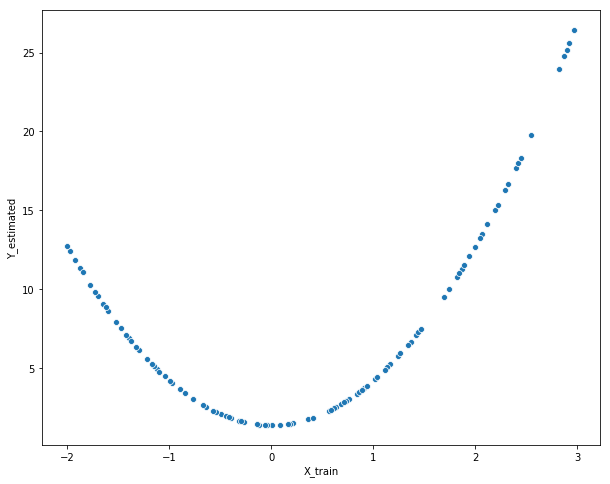

In [17]:
#X_train vs Y_estimates
plt.figure( figsize = ( 10, 8 ) )
sns.scatterplot(data.X_train,data.Y_estimated)

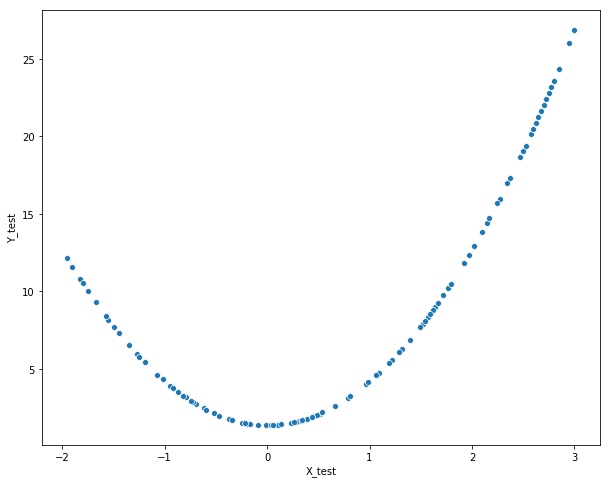

In [18]:
#X_test vs Y_test
plt.figure( figsize = ( 10, 8 ) )
sns.scatterplot(test.X_test,test.Y_test)

## 5. Find the mean and variance of the absolute error between estimated values of Y_train and Y_train 

In [19]:
#Calculating absolute error between Y_train and Y_estimated
data['error']=abs(data['Y_train']-data['Y_estimated'])

In [20]:
#Computing mean and variance 
import numpy as np
mean=np.mean(data['error'])
variance=np.var(data['error'])
mean, variance

(17.054263583415853, 86.55560163059809)

## 6. Use the validation set to analyze and reason whether the above function will generalize or overfit and how to find the most optimum function and its parameters to avoid underfitting / overfitting. Then revisit the above steps and verify whether the function estimated in Question 1 generalizes well enough. 

In [21]:
#Importing validation dataset
X_validation = pd.read_csv('X_validation.txt', sep = '\n', names = ['X_validation'])
Y_validation = pd.read_csv('Y_validation.txt', sep = '\n', names = ['Y_validation'])
valid = pd.concat([X_validation, Y_validation], axis=1, sort=False)

In [22]:
#Calculating error and Abs error
valid['Y_estimate']=m*valid['X_validation']*valid['X_validation']*valid['X_validation']+c
valid['error']=valid['Y_validation']-valid['Y_estimate']
valid['error_abs']=abs(valid['Y_validation']-valid['Y_estimate'])
valid.head()

,X_validation,Y_validation,Y_estimate,error,error_abs
0,-1.597990,-11.574706,-10.174059,-1.400647,1.400647
1,2.974874,2.640643,75.943740,-73.303097,73.303097
2,2.422111,23.823780,41.625434,-17.801654,17.801654
3,1.693467,36.299918,15.136791,21.163127,21.163127
4,0.286432,15.523480,1.449077,14.074403,14.074403


In [23]:
#Calculating Mean error and Mean absolute
mean_error=np.mean(valid['error'])
mean_error_abs=np.mean(valid['error_abs'])
mean_error, mean_error_abs

(-0.24849618473804647, 21.11062978362083)

## 7. Write a code for gradient descent algorithm to solve the least squares between the Y_train and estimated value of Y_train. Find the optimum learning rate, plot the variation of error with respect to iteration number and analyze the convergence of the gradient descent algorithm 

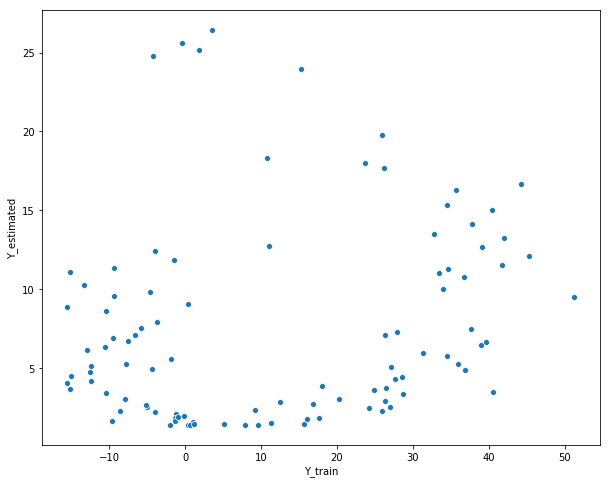

In [26]:
#Scaltter plot Y_train vs Y_estimated
plt.figure( figsize = ( 10, 8 ) )
sns.scatterplot(data.Y_train,data.Y_estimated)

In [27]:
# Building the model
m = 0
c = 0

L = 0.0001  # The learning Rate
epochs = 1000  # The number of iterations to perform gradient descent

n = float(len(data['Y_train'])) # Number of elements in X_train

# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = m*data['Y_train'] + c  # The current predicted value of Y
    D_m = (-2/n) * sum(data['Y_train'] * (data['Y_estimated'] - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(data['Y_estimated'] - Y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c
    
print (m, c)

0.20007344318978004 0.9213010466968681
